In [1]:
import pandas as pd
import numpy

Accuracy (Straight Agreement):  0.0
Thermo Agreement: 0.7328458942632171
Stiffness Agreement: 0.9077615298087739
1778
True Positive:  0.28346456692913385
False Positive:  0.17547806524184478
True Negative:  0.515185601799775
False Negative:  0.025871766029246346
Accuracy:  0.7986501687289089
Total Classified:  1778  Total Viewed:  1778


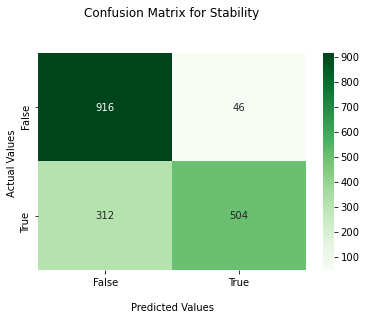

In [3]:
tp = 0
tn = 0
fp = 0
fn = 0
agree = 0
totalDiff = 0
thermoAgree = 0
stiffnessAgree = 0

import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def classifyThermoStability(value):
    if(value < 0.2):
        return 0 # stable
    else:
        return 1 # unstable

def classifyResult(value):
    if(value < 0.2):
        return 1 # unstable
    return 0 # stable

def work(df):
    global fn
    global tn
    global fp
    global tp
    global agree
    global totalDiff
    global thermoAgree
    global stiffnessAgree
    for i in range(len(df['material_id'])):
        stiffnessAgreement = classifyResult(df['stiffness_pre-logits_c0_n0'][i]) == df['stiffness_target'][i]
        thermoAgreement = classifyThermoStability(df['thermo_pred_n0'][i]) == classifyThermoStability(df['thermo_target'][i])
        if thermoAgreement:
            thermoAgree += 1
        if stiffnessAgreement:
            stiffnessAgree += 1
        # Model agrees with both predictions of stability and material is stable, true positive
        if(stiffnessAgreement and thermoAgreement and classifyThermoStability(df['thermo_target'][i]) == 0 and df['stiffness_target'][i] == 0):
            tp += 1
        else:
            # Model agrees with both predictions of stability and material is unstable, true negative (case #1)
            if(stiffnessAgreement and thermoAgreement and (classifyThermoStability(df['thermo_target'][i]) == 1 or df['stiffness_target'][i] == 1)):
                tn += 1
            # Model agrees with one of the predictions of stability and material is unstable, true negative (case #2)
            else:
                if((stiffnessAgreement or thermoAgreement) and (classifyThermoStability(df['thermo_target'][i]) == 1 or df['stiffness_target'][i] == 1)):
                    tn += 1
                # Model disagrees with both prediction (says stable) and material is unstable 
                else:
                    if(not (stiffnessAgreement and thermoAgreement) and ((classifyThermoStability(df['thermo_target'][i]) == 1 or df['stiffness_target'][i] == 1))):
                        fn += 1
                    else:
                        fp += 1
        totalDiff += 1
            
                
df = pd.read_csv(r'C:\\Users\\Matthew\\Desktop\\aviary-github\\aviary\\results\\1.csv')
work(df)
for i in range(2, 21):
    tmp = "C:\\Users\\Matthew\\Desktop\\aviary-github\\aviary\\results\\" + str(i) + ".csv"
    df2 = pd.read_csv(tmp)
    work(df2)
            
total = tp + fp + tn + fn
# Intrinsic error: https://pubs.acs.org/doi/10.1021/acscatal.1c05333, .10-.16 eV
print("Accuracy (Straight Agreement): ", agree/totalDiff)
print("Thermo Agreement: 0.7328458942632171")
print("Stiffness Agreement: 0.9077615298087739")
print(total)
print("True Positive: ", tp/total)
print("False Positive: ", fp/total)
print("True Negative: ", tn/total)
print("False Negative: ", fn/total)
print("Accuracy: ", (tp + tn)/total)
df_cm = pd.DataFrame()
df_cm['True Postivies'] = tp
df_cm['True Negatives'] = tn
df_cm['False Positives'] = fp
df_cm['False Negatives'] = fn
print("Total Classified: ", total, " Total Viewed: ", totalDiff)

temp = np.array([[tn, fn], [fp, tp]])
ax = sns.heatmap(temp, annot=True, cmap='Greens', fmt='g')
ax.set_title('Confusion Matrix for Stability\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [56]:
df = pd.read_csv(r'C:\Users\Dylan\Downloads\thermoStabilityTest.csv')
averageProbability = 0
numOnes = 0
count = 0
for entry in df['thermo']:
    if(classifyThermoStability(entry) == 2):
        numOnes += 1
    count += 1

minProb = 100
maxProb = 0
for i in range(100):
    tempCount = 0
    success = 0
    for entry in df['thermo']:
        if(classifyThermoStability(entry) == numpy.random.choice(a = [0, 2], p=[1 - numOnes/count, numOnes/count])):
            success += 1
        tempCount += 1
    if(100* success/tempCount > maxProb):
        maxProb = 100* success/tempCount
    if(100* success/tempCount < minProb):
        minProb = 100* success/tempCount
    averageProbability += (100* success/tempCount) / 100

In [57]:
print("Average Random Guessing (based on distribution):", averageProbability, "%")
print("Minimum Probabilitiy:", minProb, "%")
print("Maximum Probabilitiy:", maxProb, "%")

Average Random Guessing (based on distribution): 51.43544453186471 %
Minimum Probabilitiy: 50.66876475216365 %
Maximum Probabilitiy: 52.26986624704957 %
